In [1]:
import os
import h5py
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plot
import numpy as np
import json
import io
import unicodecsv as csv
import tensorflow as tf
#import PIL
#from PIL import Image
#print('Pillow Version:', PIL.__version__)

import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
#from resnets_utils import *
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


Using TensorFlow backend.


In [2]:
hparams = {
    "goal": "MAXIMIZE",
    "maxTrials":30,
    "maxParallelTrials":2,
    "hyperparameterMetricTag": "accuracy",
    "train_batch_size":64,
    "learning_rate":0.0005,
    "train_steps":10000,
    "batch_norm":"True",
    "ksize1":5,
    "ksize2":5,
    "nfil1":10,
    "nfil2":20,
    "dprob":0.25
}

print(hparams.get("goal", 5))
print(hparams.get("maxTrials", 5))
print(hparams.get("maxParallelTrials", 5))
print(hparams.get("hyperparameterMetricTag", 5))
print(hparams.get("train_batch_size", 2))
print(hparams.get("learning_rate", 5))
print(hparams.get("train_steps", 5))
print(hparams.get("batch_norm", 5))
print(hparams.get("ksize1", 5))
print(hparams.get("ksize2", 5))
print(hparams.get("nfil1", 5))
print(hparams.get("nfil2", 5))
print(hparams.get("dprob", 5))

MAXIMIZE
30
2
accuracy
64
0.0005
10000
True
5
5
10
20
0.25


In [3]:
traindirpath = "/home/hfinndi/Glioma/etrain"
evaldirpath = "/home/hfinndi/Glioma/eval"
outputdirpath = "~/outputdir"
trainfilecount = 0
trainfilenames = []
evalfilecount = 0
evalfilenames = []
trainmaxpoints = []
trainmaxpoint = 0
evalmaxpoints = []
evalmaxpoint = 0
trainimagelist = []
trainlabellist = []
trainborderpointslist = []
evalimagelist = []
evallabellist = []
evalborderpointslist = []
print(traindirpath)
print(evaldirpath)

HEIGHT = 512
WIDTH = 512
NCLASSES = 3

/home/hfinndi/Glioma/etrain
/home/hfinndi/Glioma/eval


In [4]:
def process_train_matfile(index,filename):
    """
    this will take a file and extract the image
    """
    
    keys = []
    with h5py.File(traindirpath +"/" + filename, 'r') as f: # open file
        f.visit(keys.append) # append all keys to list
        #print(filename)
        #print(keys)
        #Y1 = f.get('cjdata/PID') 
        Y2 = f.get('cjdata/image') 
        Y3 = f.get('cjdata/label')
        #4 = f.get('cjdata/tumorBorder')

        #Y5 = f.get('cjdata/tumorMask')
        #X1 = np.array(Y1)
        X2 = np.array(Y2)
        
        '''
        if (len(X2[0]) == 512 and len(X2[1]) == 512):
            a=1
        else:
            print("remove")
            print(filename)
        '''
        X3 = np.array(Y3)
        #print(filename)
        #print(X3)
        #4 = np.array(Y4)
        
        
        # prepare more versions of image
        
        #plot.imshow(X2)
        #plot.show()
        
        X21 = X2
        X22 = np.rot90(X2, 1)
        X23 = np.rot90(X2, 2)
        X24 = np.rot90(X2, 3)
        X25 = np.flip(X21, 0)
        X26 = np.flip(X22, 0)
        #X27 = np.flip(X23, 0)
        #X28 = np.flip(X24, 0)
        
        #X5 = np.array(Y5)
        #print(X1)
        #print(X2) 
        #print(X3)
        #numberofpoints= Y4.shape[1]
        #trainmaxpoints.append(X4.shape[1])
        
        trainimagelist.append(X21)
        trainimagelist.append(X22)
        trainimagelist.append(X23)
        trainimagelist.append(X24)
        trainimagelist.append(X25)
        trainimagelist.append(X26)
        #trainimagelist.append(X27)
        #trainimagelist.append(X28)

        trainlabellist.append(X3)
        trainlabellist.append(X3)
        trainlabellist.append(X3)
        trainlabellist.append(X3)
        trainlabellist.append(X3)
        trainlabellist.append(X3)
        #trainlabellist.append(X3)
        #trainlabellist.append(X3)

        #rainborderpointslist.append(X4)
        
    return 1    


In [5]:
def process_eval_matfile(index,filename):
    """
    this will take a file and extract the image
    """
    
    keys = []
    with h5py.File(evaldirpath +"/" + filename, 'r') as f: # open file
        f.visit(keys.append) # append all keys to list
        print(filename)
        #print(keys)
        #Y1 = f.get('cjdata/PID') 
        Y2 = f.get('cjdata/image') 
        Y3 = f.get('cjdata/label')
        #Y4 = f.get('cjdata/tumorBorder')

        #Y5 = f.get('cjdata/tumorMask')
        #X1 = np.array(Y1)
        X2 = np.array(Y2)
        X3 = np.array(Y3)
        #print(filename)
        #print(X3)
        #X4 = np.array(Y4)

        #X5 = np.array(Y5)
        #print(X1)
        #print(X2) 
        #print(X3)
        #numberofpoints= Y4.shape[1]
        
        X21 = X2
        X22 = np.rot90(X2, 1)
        X23 = np.rot90(X2, 2)
        X24 = np.rot90(X2, 3)
        X25 = np.flip(X21, 0)
        X26 = np.flip(X22, 0)
        #X27 = np.flip(X23, 0)
        #X28 = np.flip(X24, 0)
        
        #evalmaxpoints.append(X4.shape[1])
                
        evalimagelist.append(X21)
        evalimagelist.append(X22)
        evalimagelist.append(X23)
        evalimagelist.append(X24)
        evalimagelist.append(X25)
        evalimagelist.append(X26)
        #evalimagelist.append(X27)
        #evalimagelist.append(X28)

        evallabellist.append(X3)
        evallabellist.append(X3)
        evallabellist.append(X3)
        evallabellist.append(X3)
        evallabellist.append(X3)
        evallabellist.append(X3)
        #evallabellist.append(X3)
        #evallabellist.append(X3)
        
        #evalborderpointslist.append(X4)
        
    return 1    

/home/hfinndi/Glioma/etrain
N22406.mat
N2767.mat
N22061.mat
N2818.mat
N22718.mat
N22203.mat
N22393.mat
N2836.mat
N21903.mat
N22442.mat
N22577.mat
N22131.mat
N2775.mat
N22746.mat
N21945.mat
N22195.mat
N22256.mat
N22628.mat
N22735.mat
N22162.mat
N22472.mat
N2831.mat
N22225.mat
N22507.mat
N2847.mat
N2762.mat
N21925.mat
N2781.mat
N22218.mat
N22171.mat
N2770.mat
N22506.mat
N21921.mat
N22224.mat
N22413.mat
N22573.mat
N22363.mat
N2883.mat
N22246.mat
N21844.mat
N22432.mat
N22126.mat
N2843.mat
N22484.mat
N21934.mat
N22691.mat
N22086.mat
N2864.mat
N2792.mat
N22632.mat
N2853.mat
N22315.mat
N22713.mat
N22173.mat
N22332.mat
N22546.mat
N2777.mat
N22405.mat
N22115.mat
N22047.mat
N22663.mat
N22697.mat
N22700.mat
N22273.mat
N22483.mat
N22793.mat
N22275.mat
N22466.mat
N22720.mat
N22768.mat
N22303.mat
N22387.mat
N2801.mat
N21972.mat
N22011.mat
N22075.mat
N2819.mat
N22190.mat
N22384.mat
N22204.mat
N22307.mat
N22457.mat
N21870.mat
N22794.mat
N22669.mat
N22161.mat
N2887.mat
N22281.mat
N22165.mat
N21846.mat


/home/hfinndi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
/home/hfinndi/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


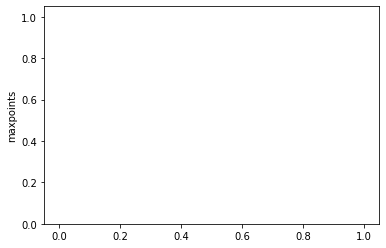

In [6]:
print(traindirpath)

for root, dirs, files in os.walk(traindirpath):
    for filename in files:
            print(filename)
            trainfilecount+=1
            trainfilenames.append(filename)
            
for i in range(trainfilecount):
    process_train_matfile(i,trainfilenames[i])

%matplotlib inline
plot.hist(trainmaxpoints, normed=True, bins=30)
plot.ylabel('maxpoints');
print(trainmaxpoints)


/home/hfinndi/Glioma/eval
N22943.mat
N22975.mat
N22808.mat
N22959.mat
N22657.mat
N22813.mat
N22868.mat
N22979.mat
N22892.mat
N22643.mat
N22872.mat
N22993.mat
N22963.mat
N23004.mat
N22964.mat
N22843.mat
N22918.mat
N116.mat
N22983.mat
N22884.mat
N22949.mat
N22867.mat
N22815.mat
N22881.mat
N23023.mat
N22970.mat
N22978.mat
N23022.mat
N22981.mat
N22849.mat
N22935.mat
N22988.mat
N22928.mat
N22637.mat
N31554.mat
N22939.mat
N23007.mat
N22821.mat
N22827.mat
N22823.mat
N22851.mat
N22809.mat
N23006.mat
N22916.mat
N22810.mat
N22865.mat
N22919.mat
N22828.mat
N22893.mat
N23014.mat
N22974.mat
N22930.mat
N22847.mat
N22819.mat
N22910.mat
N23036.mat
N22980.mat
N22885.mat
N22855.mat
N22651.mat
N22801.mat
N22653.mat
N22954.mat
N23003.mat
N22876.mat
N22655.mat
N22887.mat
N22903.mat
N23026.mat
N22977.mat
N22971.mat
N22806.mat
N23013.mat
N22997.mat
N22875.mat
N22962.mat
N22814.mat
N22818.mat
N22902.mat
N23018.mat
N22639.mat
N22648.mat
N22879.mat
N22985.mat
N23035.mat
N22841.mat
N23010.mat
N22917.mat
N22921.m

/home/hfinndi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


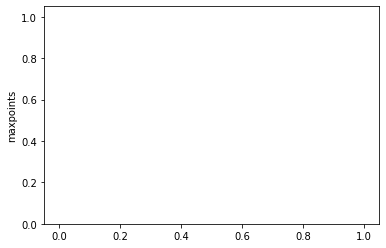

In [7]:
print(evaldirpath)
for root, dirs, files in os.walk(evaldirpath):
    for filename in files:
            evalfilecount+=1
            evalfilenames.append(filename)
            
for i in range(evalfilecount):
    process_eval_matfile(i,evalfilenames[i])

%matplotlib inline
plot.hist(evalmaxpoints, normed=True, bins=30)
plot.ylabel('maxpoints');
print(evalmaxpoints)

In [8]:
print(trainimagelist[0].shape)
trainfullimagearray = np.array(trainimagelist)
print(trainfullimagearray.shape)
print(trainfullimagearray)
reshapedtrainimagearray = trainfullimagearray.reshape(trainfilecount*6,512,512,1)
#print(reshapedtrainarray)
print(reshapedtrainimagearray.shape)

(512, 512)
(7014, 512, 512)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(7014, 512, 512, 1)


In [9]:
print(evalimagelist[0].shape)
evalfullimagearray = np.array(evalimagelist)
print(evalfullimagearray.shape)
reshapedevalimagearray = evalfullimagearray.reshape(evalfilecount*6,512,512,1)
#print(reshapedtrainarray)
print(reshapedevalimagearray.shape)

(512, 512)
(1686, 512, 512)
(1686, 512, 512, 1)


In [10]:
print(trainlabellist[0].shape)
trainfulllabelarray = np.array(trainlabellist)
print(trainfulllabelarray.shape)
reshapedtrainlabelarray = trainfulllabelarray.reshape(trainfilecount*6)
print(reshapedtrainlabelarray)
print(reshapedtrainlabelarray.shape)

(1, 1)
(7014, 1, 1)
[2. 2. 2. ... 2. 2. 2.]
(7014,)


In [11]:
print(evallabellist[0].shape)
evalfulllabelarray = np.array(evallabellist)
print(trainfulllabelarray.shape)
reshapedevallabelarray = evalfulllabelarray.reshape(evalfilecount*6)
print(reshapedevallabelarray)
print(reshapedevallabelarray.shape)

(1, 1)
(7014, 1, 1)
[2. 2. 2. ... 2. 2. 2.]
(1686,)


In [12]:
print(reshapedtrainlabelarray.ravel())
#one hot train set label
num_labels = reshapedtrainlabelarray.shape[0]
print(num_labels)
reshapedtrainlabelarrayintegerlist = reshapedtrainlabelarray.astype(int)
reshapedtrainlabelarrayinteger = np.array(reshapedtrainlabelarrayintegerlist)
print(reshapedtrainlabelarrayinteger)
trainlabelsonehot = np.eye(NCLASSES)[reshapedtrainlabelarrayinteger-1]
print(trainlabelsonehot)

[2. 2. 2. ... 2. 2. 2.]
7014
[2 2 2 ... 2 2 2]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [13]:
print(reshapedevallabelarray.ravel())
#one hot train set label
num_labels = reshapedevallabelarray.shape[0]
print(num_labels)
reshapedevallabelarrayintegerlist = reshapedevallabelarray.astype(int) 
reshapedevallabelarrayinteger = np.array(reshapedevallabelarrayintegerlist)
print(reshapedevallabelarrayinteger)
evallabelsonehot = np.eye(NCLASSES)[reshapedevallabelarrayinteger-1]
print(evallabelsonehot)

[2. 2. 2. ... 2. 2. 2.]
1686
[2 2 2 ... 2 2 2]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [14]:
def resnet_identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    print("in identity block")
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    print(X.shape)
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    print(X.shape)
    
    ### START CODE HERE ###
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', 
               kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    print(X.shape)
    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', 
               kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    print(X.shape)
    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    print(X.shape)
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X


In [15]:

def resnet_convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X
    print("in conv block")
    print(X.shape)

    ##### MAIN PATH #####
    # First component of main path 
    
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '2a', 
               kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    print(X.shape)
    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', 
               kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    print(X.shape)
    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', 
               kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    print(X.shape)
    

    ##### SHORTCUT PATH #### (≈2 lines)
    
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)
    
    

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    print(X.shape)
    ### END CODE HERE ###
    
    return X


In [16]:
def ResNet50(input_shape = (512, 512, 1), classes = 3):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    print(X_input.shape)
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    print("shape1:")
    print(X.shape)
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    print("shape2:")
    print(X.shape)
    # Stage 2
    X = resnet_convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = resnet_identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = resnet_identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    
    print("shape3:")
    print(X.shape)
    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    
    X = resnet_convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = resnet_identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = resnet_identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = resnet_identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    
    print("shape4:")
    print(X.shape)
    # Stage 4 (≈6 lines)
    X = resnet_convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = resnet_identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = resnet_identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = resnet_identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = resnet_identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = resnet_identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    
    print("shape5:")
    print(X.shape)
    # Stage 5 (≈3 lines)
    X = resnet_convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = resnet_identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = resnet_identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    print("shape6:")
    print(X.shape)

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2, 2))(X)
    
    ### END CODE HERE ###
    print("shape7:")
    print(X.shape)
    
    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    print("shape8:")
    print(X.shape)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNetFifty')

    return model


In [17]:
model = ResNet50(input_shape = (512, 512, 1), classes = 3)

(?, 512, 512, 1)
shape1:
(?, 518, 518, 1)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
shape2:
(?, 127, 127, 64)
in conv block
(?, 127, 127, 64)
(?, 127, 127, 64)
(?, 127, 127, 64)
(?, 127, 127, 256)
(?, 127, 127, 256)
in identity block
(?, 127, 127, 256)
(?, 127, 127, 64)
(?, 127, 127, 64)
(?, 127, 127, 256)
(?, 127, 127, 256)
in identity block
(?, 127, 127, 256)
(?, 127, 127, 64)
(?, 127, 127, 64)
(?, 127, 127, 256)
(?, 127, 127, 256)
shape3:
(?, 127, 127, 256)
in conv block
(?, 127, 127, 256)
(?, 64, 64, 128)
(?, 64, 64, 128)
(?, 64, 64, 512)
(?, 64, 64, 512)
in identity block
(?, 64, 64, 512)
(?, 64, 64, 128)
(?, 64, 64, 128)
(?, 64, 64, 512)
(?, 64, 64, 512)
in identity block
(?, 64, 64, 512)
(?, 64, 64, 128)
(?, 64, 64, 128)
(?, 64, 64, 512)
(?, 64, 64, 512)
in identity block
(?, 64, 64, 512)
(?, 64, 64, 128)
(?, 64, 64, 128)
(?, 64, 64, 512)
(?, 64, 64, 512)
shape4:
(?, 64, 64, 512)
in conv block
(?, 64, 64, 512)
(?, 32, 32, 256)
(?, 32, 32, 2

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
reshapedtrainimagearray, reshapedevalimagearray, trainlabelsonehot, evallabelsonehot
# Normalize image vectors
X_train = reshapedtrainimagearray/255.
X_test = reshapedevalimagearray/255.

# Convert training and test labels to one hot matrices
Y_train = trainlabelsonehot #convert_to_one_hot(Y_train_orig, 6).T
Y_test = evallabelsonehot #convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 7014
number of test examples = 1686
X_train shape: (7014, 512, 512, 1)
Y_train shape: (7014, 3)
X_test shape: (1686, 512, 512, 1)
Y_test shape: (1686, 3)


In [ ]:
for i in range(12):
    model.fit(X_train, Y_train, epochs = 5, batch_size = 1)
    model.save("Gliomamodel"+str(i)+".h5")


Train on 7014 samples
Epoch 1/5
7014/7014 [==============================] - 4330s 617ms/sample - loss: 1.5228 - acc: 0.9628
Epoch 2/5
7014/7014 [==============================] - 4311s 615ms/sample - loss: 0.3230 - acc: 0.9662
Epoch 3/5
7014/7014 [==============================] - 4310s 614ms/sample - loss: 0.2736 - acc: 0.9699
Epoch 4/5
7014/7014 [==============================] - 4308s 614ms/sample - loss: 0.2855 - acc: 0.9674
Epoch 5/5
7014/7014 [==============================] - 4310s 614ms/sample - loss: 0.3090 - acc: 0.9669
Train on 7014 samples
Epoch 1/5
7014/7014 [==============================] - 4304s 614ms/sample - loss: 0.3359 - acc: 0.9645
Epoch 2/5
7014/7014 [==============================] - 4301s 613ms/sample - loss: 0.3466 - acc: 0.9642
Epoch 3/5
7014/7014 [==============================] - 4295s 612ms/sample - loss: 0.2976 - acc: 0.9658
Epoch 4/5
5988/7014 [========================>.....] - ETA: 10:28 - loss: 0.2934 - acc: 0.9646